In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

from args_jupyter import args, createfolder

In [2]:
print(args)

{'study_area': 'Taipei', 'working_folder': '/home/jack/ssd/01_ty_research', 'I_y': [23.9125, 26.15], 'I_x': [120.4, 122.6375], 'F_y': [24.6625, 25.4], 'F_x': [121.15, 121.8875], 'O_y': [20, 27], 'O_x': [118, 123.5], 'res_degree': 0.0125, 'compression': 'bz2', 'figure_dpi': 150, 'RAD_cmap': ['#FFFFFF', '#FFD8D8', '#FFB8B8', '#FF9090', '#FF6060', '#FF2020', '#CC0000', '#A00000'], 'RAD_level': [-5, 0, 10, 20, 30, 40, 50, 60, 70], 'QPE_cmap': ['#FFFFFF', '#D2D2FF', '#AAAAFF', '#8282FF', '#6A6AFF', '#4242FF', '#1A1AFF', '#000090', '#000040', '#000030'], 'QPE_level': [-5, 0, 10, 20, 35, 50, 80, 120, 160, 200], 'QPF_cmap': ['#FFFFFF', '#D2D2FF', '#AAAAFF', '#8282FF', '#6A6AFF', '#4242FF', '#1A1AFF', '#000090', '#000040', '#000030'], 'QPF_level': [-5, 0, 10, 20, 35, 50, 80, 120, 160, 200], 'ty_list': '/home/jack/ssd/01_ty_research/ty_list.xlsx', 'sta_list': '/home/jack/ssd/01_ty_research/sta_list_all.xlsx', 'TW_map_file': '/home/jack/ssd/01_ty_research/07_gis_data/03_TW_shapefile/gadm36_TWN_2'

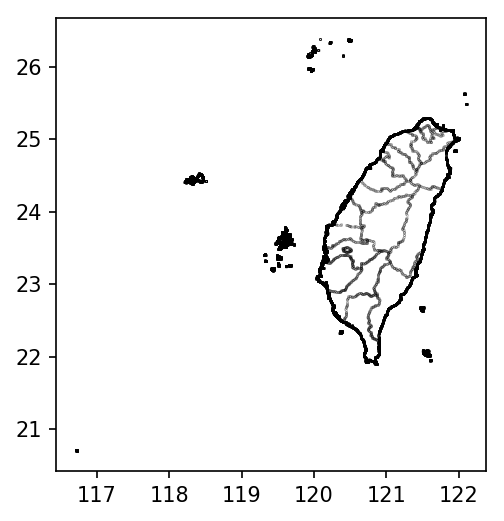

In [9]:
# import geopandas as gpd
# shapefile = gpd.read_file(args.TW_map_file+'.shp')['geometry']
# shapefile

import shapefile
shape = shapefile.Reader(args.TW_map_file)
#first feature of the shapefile
writer = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')
all_points = pd.DataFrame([],columns=pd.Index(['lon','lat']))
fig = plt.figure(dpi=args.figure_dpi)
ax = plt.gca()
for record, shape in zip(shape.records(), shape.shapes()):
    points = pd.DataFrame(shape.points, columns=pd.Index(['lon','lat']), 
                          index=pd.Index(np.arange(len(shape.points)), name=record[8]))
    points.to_excel(writer, sheet_name=record[8])
    all_points = pd.concat([all_points, points], axis=0)
    ax.plot(points.lon, points.lat, 'k.', markersize=0.1)
    ax.axis('scaled')
writer.save()

## Taiwan

In [14]:
os.path.join(args.radar_folder, i, j)

'/home/jack/ssd/01_ty_research/01_radar_data/01_compressed_files/2012.SAOLA'

In [15]:
m = Basemap(projection='cyl', resolution='h', llcrnrlat=args.O_y[0], urcrnrlat=args.O_y[1], 
            llcrnrlon=args.O_x[0], urcrnrlon=args.O_x[1])

figures_folder = os.path.join(args.radar_figures_folder, 'Taiwan')

X, Y = np.meshgrid(np.linspace(args.O_x[0],args.O_x[1],args.O_shape[0]), 
                   np.linspace(args.O_y[0],args.O_y[1],args.O_shape[1]))

fig = plt.figure(dpi=args.figure_dpi)
createfolder(os.path.join(figures_folder))
for i in sorted(os.listdir(args.wrangled_radar_folder)):
    createfolder(os.path.join(figures_folder, i))
    for idx, j in enumerate(sorted(os.listdir(os.path.join(args.wrangled_radar_folder, i)))):
        ax = plt.gca()
        data = pd.read_pickle(os.path.join(args.wrangled_radar_folder, i, j), compression=args.compression)
        _ = m.readshapefile(args.TW_map_file, name='Taiwan', linewidth=0.25, drawbounds=True, color='k', ax=ax)
        cs = m.contourf(x=X, y=Y, data=data.values, colors=args[i+'_cmap'], levels=args[i+'_level'], ax=ax)
        ax.set_xlabel(r'longtitude($^o$)',fontdict={'fontsize':7})
        ax.set_ylabel(r'latitude($^o$)',fontdict={'fontsize':7})
        _ = ax.set_xticks(ticks = np.linspace(args.O_x[0], args.O_x[1], 5))
        _ = ax.set_yticks(ticks = np.linspace(args.O_y[0], args.O_y[1], 5))
        ax.tick_params('both', labelsize=7)
        cbar = fig.colorbar(cs)
        cbar.ax.tick_params(labelsize=7)
        fig.savefig(os.path.join(figures_folder, i, j[:-4]+'.png'), dpi=150, bbox_inches='tight')
        # 清除 axes 重新宣告 axes畫圖
        ax.cla()
        # 清空 fig畫布
        fig.clf()
        if idx % 1000 == 0:
            print(i, idx+1, j)

QPE 1 2012.SAOLA.201207312100.pkl
QPE 1001 2013.SOULIK.201307130110.pkl
QPE 2001 2015.CHAN-HOM.201507101110.pkl
QPE 3001 2016.MALAKAS.201609171820.pkl
QPF 1 2012.SAOLA.201207312100.pkl
QPF 1001 2013.SOULIK.201307131120.pkl
QPF 2001 2015.CHAN-HOM.201507102210.pkl
RAD 1 2012.SAOLA.201207312100.pkl
RAD 1001 2013.SOULIK.201307130110.pkl
RAD 2001 2015.CHAN-HOM.201507101110.pkl
RAD 3001 2016.MALAKAS.201609171820.pkl


<Figure size 900x600 with 0 Axes>

## Taipei

In [4]:
m= Basemap(projection='cyl', resolution='h', llcrnrlat=args.I_y[0], 
           urcrnrlat=args.I_y[1], llcrnrlon=args.I_x[0], urcrnrlon=args.I_x[1])

figures_folder = os.path.join(args.radar_figures_folder, 'Taipei')

X, Y = np.meshgrid(np.linspace(args.O_x[0],args.O_x[1],args.O_shape[0]), 
                   np.linspace(args.O_y[0],args.O_y[1],args.O_shape[1]))

fig = plt.figure(dpi=args.figure_dpi)

for i in sorted(os.listdir(args.wrangled_radar_folder)):
    createfolder(os.path.join(figures_folder, i))
    for idx, j in enumerate(sorted(os.listdir(os.path.join(args.wrangled_radar_folder, i)))):
        ax = plt.gca()
        data = pd.read_pickle(os.path.join(args.wrangled_radar_folder, i, j), compression=args.compression)
        _ = m.readshapefile(args.TW_map_file, name='Taiwan', linewidth=0.25, drawbounds=True, color='k', ax=ax)
        cs = m.contourf(x=X, y=Y, data=data, colors=args[i+'_cmap'], levels=args[i+'_level'], ax=ax)
        ax.set_xlabel(r'longtitude($^o$)',fontdict={'fontsize':7})
        ax.set_ylabel(r'latitude($^o$)',fontdict={'fontsize':7})
        _ = ax.set_xticks(ticks = np.linspace(args.I_x[0], args.I_x[1], 5))
        _ = ax.set_yticks(ticks = np.linspace(args.I_y[0], args.I_y[1], 5))
        ax.tick_params('both', labelsize=7)
        cbar = fig.colorbar(cs)
        cbar.ax.tick_params(labelsize=7)
        fig.savefig(os.path.join(figures_folder, i, j[:-4]+'.png'), dpi=150, bbox_inches='tight')
        if idx % 1000 == 0:
            print(i, idx+1, j[:-4]+'.png')
        # 清除 axes 重新宣告 axes畫圖
        ax.cla()
        # 清空 fig畫布
        fig.clf()

QPE 1 2012.SAOLA.201207312100.png
QPE 1001 2013.SOULIK.201307130110.png
QPE 2001 2015.CHAN-HOM.201507101110.png
QPE 3001 2016.MALAKAS.201609171820.png
QPF 1 2012.SAOLA.201207312100.png
QPF 1001 2013.SOULIK.201307131120.png
QPF 2001 2015.CHAN-HOM.201507102210.png
RAD 1 2012.SAOLA.201207312100.png
RAD 1001 2013.SOULIK.201307130110.png
RAD 2001 2015.CHAN-HOM.201507101110.png
RAD 3001 2016.MALAKAS.201609171820.png


<Figure size 900x600 with 0 Axes>

In [6]:
data = pd.read_pickle(os.path.join(args.wrangled_radar_folder,'QPE', '2012.SAOLA.201207312100.pkl'), 
                              compression=args.compression).loc[args.I_y[1]:args.I_y[0], args.I_x[0]:args.I_x[1]]
data.head()

xgitude,120.4,120.4125,120.425,120.4375,120.45,120.4625,120.475,120.4875,120.5,120.5125,...,122.525,122.5375,122.55,122.5625,122.575,122.5875,122.6,122.6125,122.625,122.6375
yitude,,,,,,,,,,,,,,,,,,,,,
26.1500,0.5,0.50,0.50,0.75,0.75,1.0,1.0,1.00,1.00,1.00,...,0.5,0.5,0.5,0.5,0.50,0.50,0.50,0.50,0.25,0.25
26.1375,0.5,0.50,0.50,0.75,0.75,1.0,1.0,1.25,1.25,1.25,...,0.5,0.5,0.5,0.5,0.50,0.50,0.75,0.50,0.25,0.25
26.1250,0.5,0.50,0.75,0.75,0.75,1.0,1.0,1.25,1.25,1.25,...,0.5,0.5,0.5,0.5,0.50,0.50,0.75,0.75,0.75,0.75
26.1125,0.5,0.50,0.75,0.75,0.75,1.0,1.0,1.25,1.25,1.25,...,0.5,0.5,0.5,0.5,0.50,0.50,0.50,0.75,1.00,0.75
26.1000,0.5,0.75,0.75,0.75,0.75,1.0,1.0,1.00,1.00,1.00,...,0.5,0.5,0.5,0.5,0.75,0.75,0.75,0.75,0.75,1.00
